**How to Run Code?**

pip install -r requirements.txt

In [1]:
!pip freeze > requirements.txt 

**BOSTON HOUSE PRICE PREDICTION**

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sb
from scipy.stats import norm
from sklearn.ensemble import ExtraTreesRegressor
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [168]:
df = pd.read_csv("Boston.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


    Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

**Exploratory Data Analysis**

In [169]:
df.rename(columns = {'MEDV':'PRICE'},inplace = True)

In [170]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


**Understanding the Data and statistical analysis**

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  PRICE    506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [172]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [173]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'PRICE'],
      dtype='object')

In [174]:
#unique number of values in the dataset
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
LSTAT      455
PRICE      229
dtype: int64

In [175]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
PRICE      0
dtype: int64

In [176]:
print(df.isna().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
PRICE      0
dtype: int64


**DATA VISUALISATION**

**Univariate Analysis**

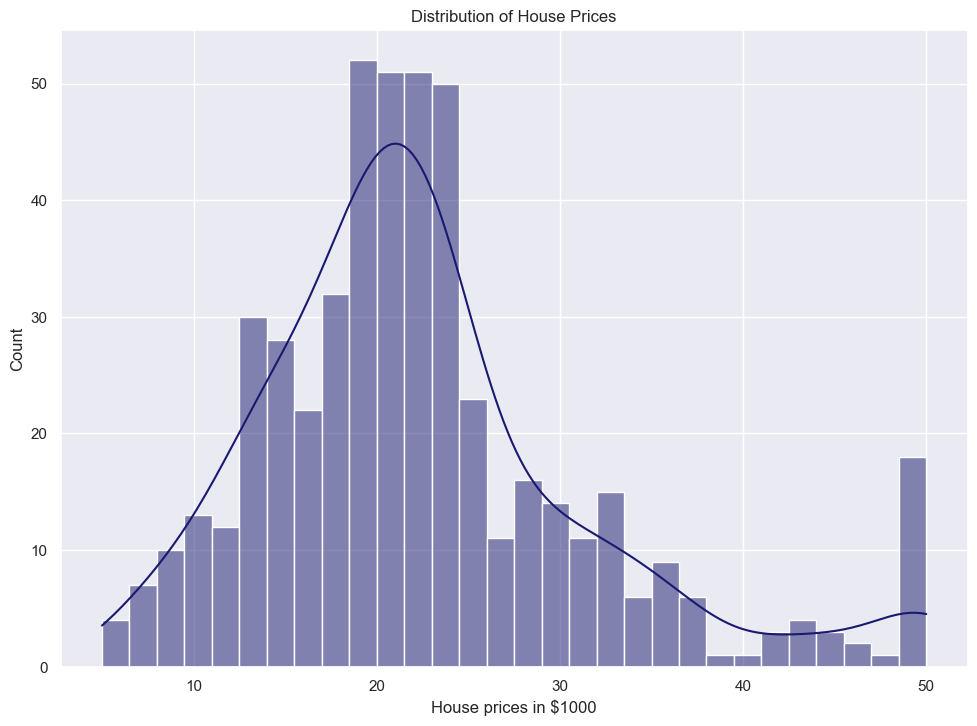

In [177]:
sb.set(rc={'figure.figsize':(11.7, 8.27)})
sb.histplot(df['PRICE'], color="midnightblue", bins=30, kde=True)  
plt.xlabel("House prices in $1000")
plt.title("Distribution of House Prices")  
plt.show()

In [178]:
df['PRICE_log'] = np.log(df['PRICE'])

Q1 = df['PRICE'].quantile(0.25) 
Q3 = df['PRICE'].quantile(0.75) 
IQR = Q3 - Q1 

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#capping (Winsorization)
df['PRICE_capped'] = np.where(df['PRICE'] < lower_bound, lower_bound, 
                              np.where(df['PRICE'] > upper_bound, upper_bound, df['PRICE']))


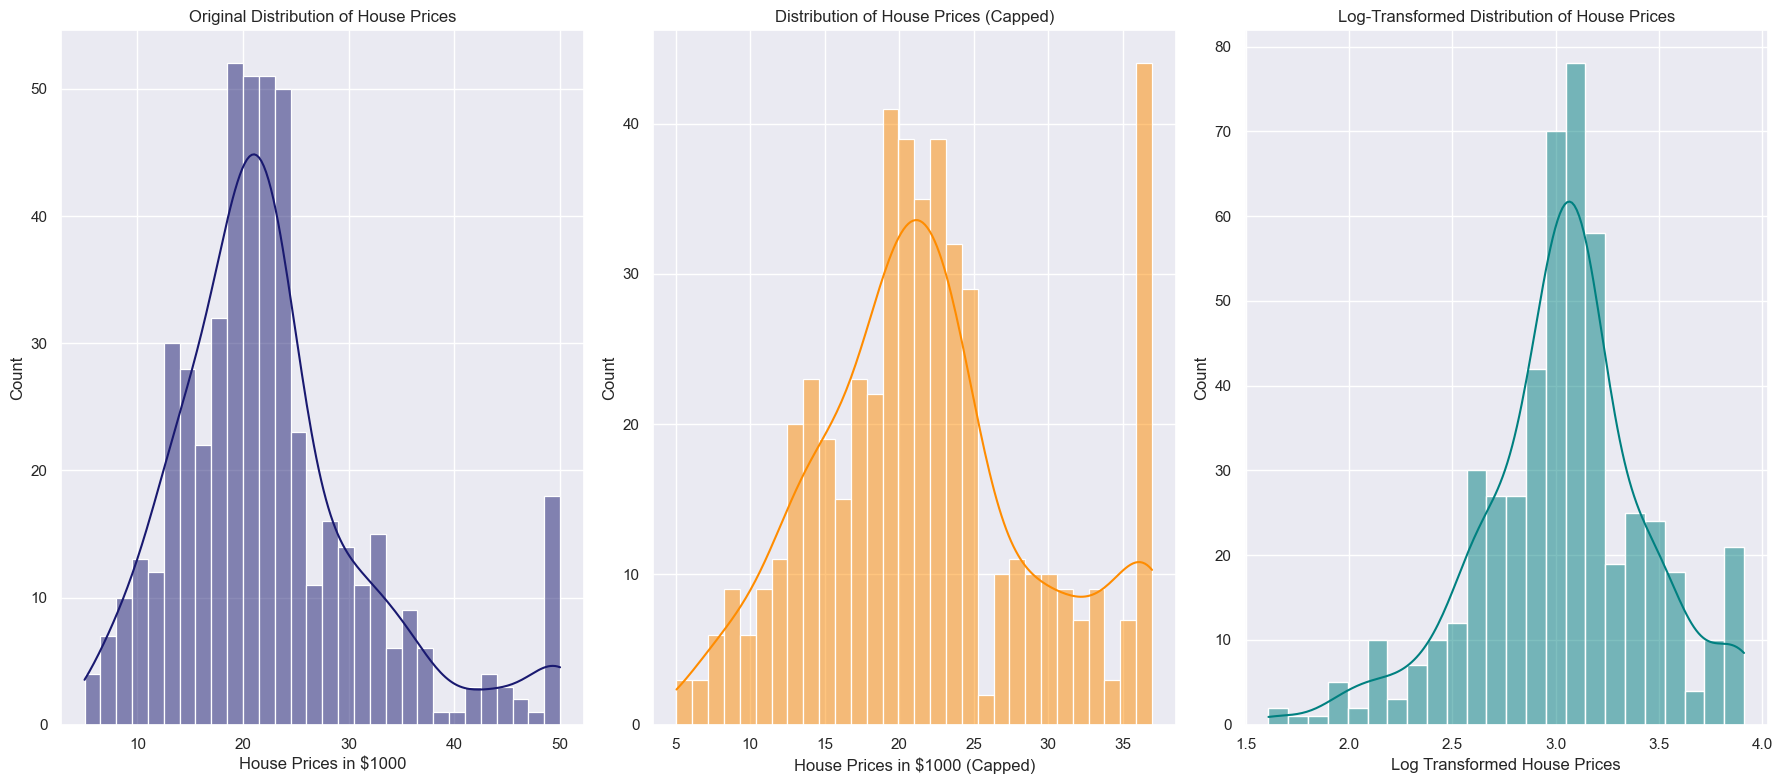

In [179]:
plt.figure(figsize=(18, 8))

plt.subplot(1, 3, 1)
sb.histplot(df['PRICE'], color="midnightblue", bins=30, kde=True)
plt.xlabel("House Prices in $1000")
plt.title("Original Distribution of House Prices")

plt.subplot(1, 3, 2)
sb.histplot(df['PRICE_capped'], color="darkorange", bins=30, kde=True)
plt.xlabel("House Prices in $1000 (Capped)")
plt.title("Distribution of House Prices (Capped)")

plt.subplot(1, 3, 3)
sb.histplot(data=df, x='PRICE_log', kde=True, color="teal")
plt.xlabel("Log Transformed House Prices")
plt.title("Log-Transformed Distribution of House Prices")

plt.tight_layout()
plt.show()

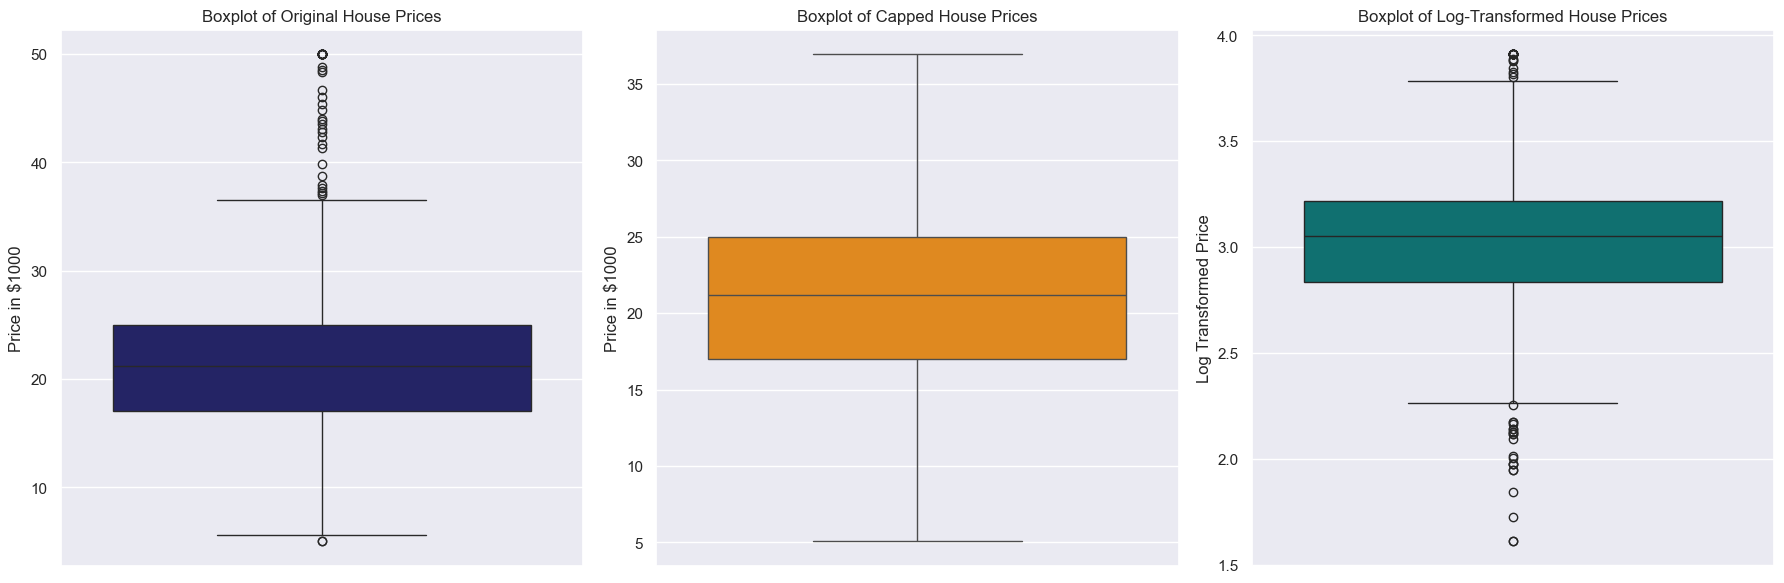

In [180]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sb.boxplot(data=df, y='PRICE', color="midnightblue")
plt.title("Boxplot of Original House Prices")
plt.ylabel("Price in $1000")

plt.subplot(1, 3, 2)
sb.boxplot(data=df, y='PRICE_capped', color="darkorange")
plt.title("Boxplot of Capped House Prices")
plt.ylabel("Price in $1000")

plt.subplot(1, 3, 3)
sb.boxplot(data=df, y='PRICE_log', color="teal")
plt.title("Boxplot of Log-Transformed House Prices")
plt.ylabel("Log Transformed Price")

plt.tight_layout()
plt.show()

In [181]:
def draw_plots(df, var, rows, cols):
    fig = plt.figure(figsize=(20, 20))
    for i, f in enumerate(var):
        ax = fig.add_subplot(rows, cols, i + 1)
        
        df[f].hist(bins=20, ax=ax, facecolor='midnightblue', alpha=0.6)
        
        mu, std = df[f].mean(), df[f].std()
        
        x = np.linspace(df[f].min(), df[f].max(), 100)
        
        p = norm.pdf(x, mu, std)
        
        p *= (len(df[f]) * np.diff(np.histogram(df[f], bins=20)[1])).max()
        
        ax.plot(x, p, 'k', linewidth=2, color='orange')
        
        ax.set_title(f'{f} Distribution', color='DarkRed')
    
    fig.tight_layout()

C:\Users\malav\AppData\Local\Temp\ipykernel_14748\1826471253.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.1, 0.1, 0.1, 1)). The keyword argument will take precedence.
  ax.plot(x, p, 'k', linewidth=2, color='orange')


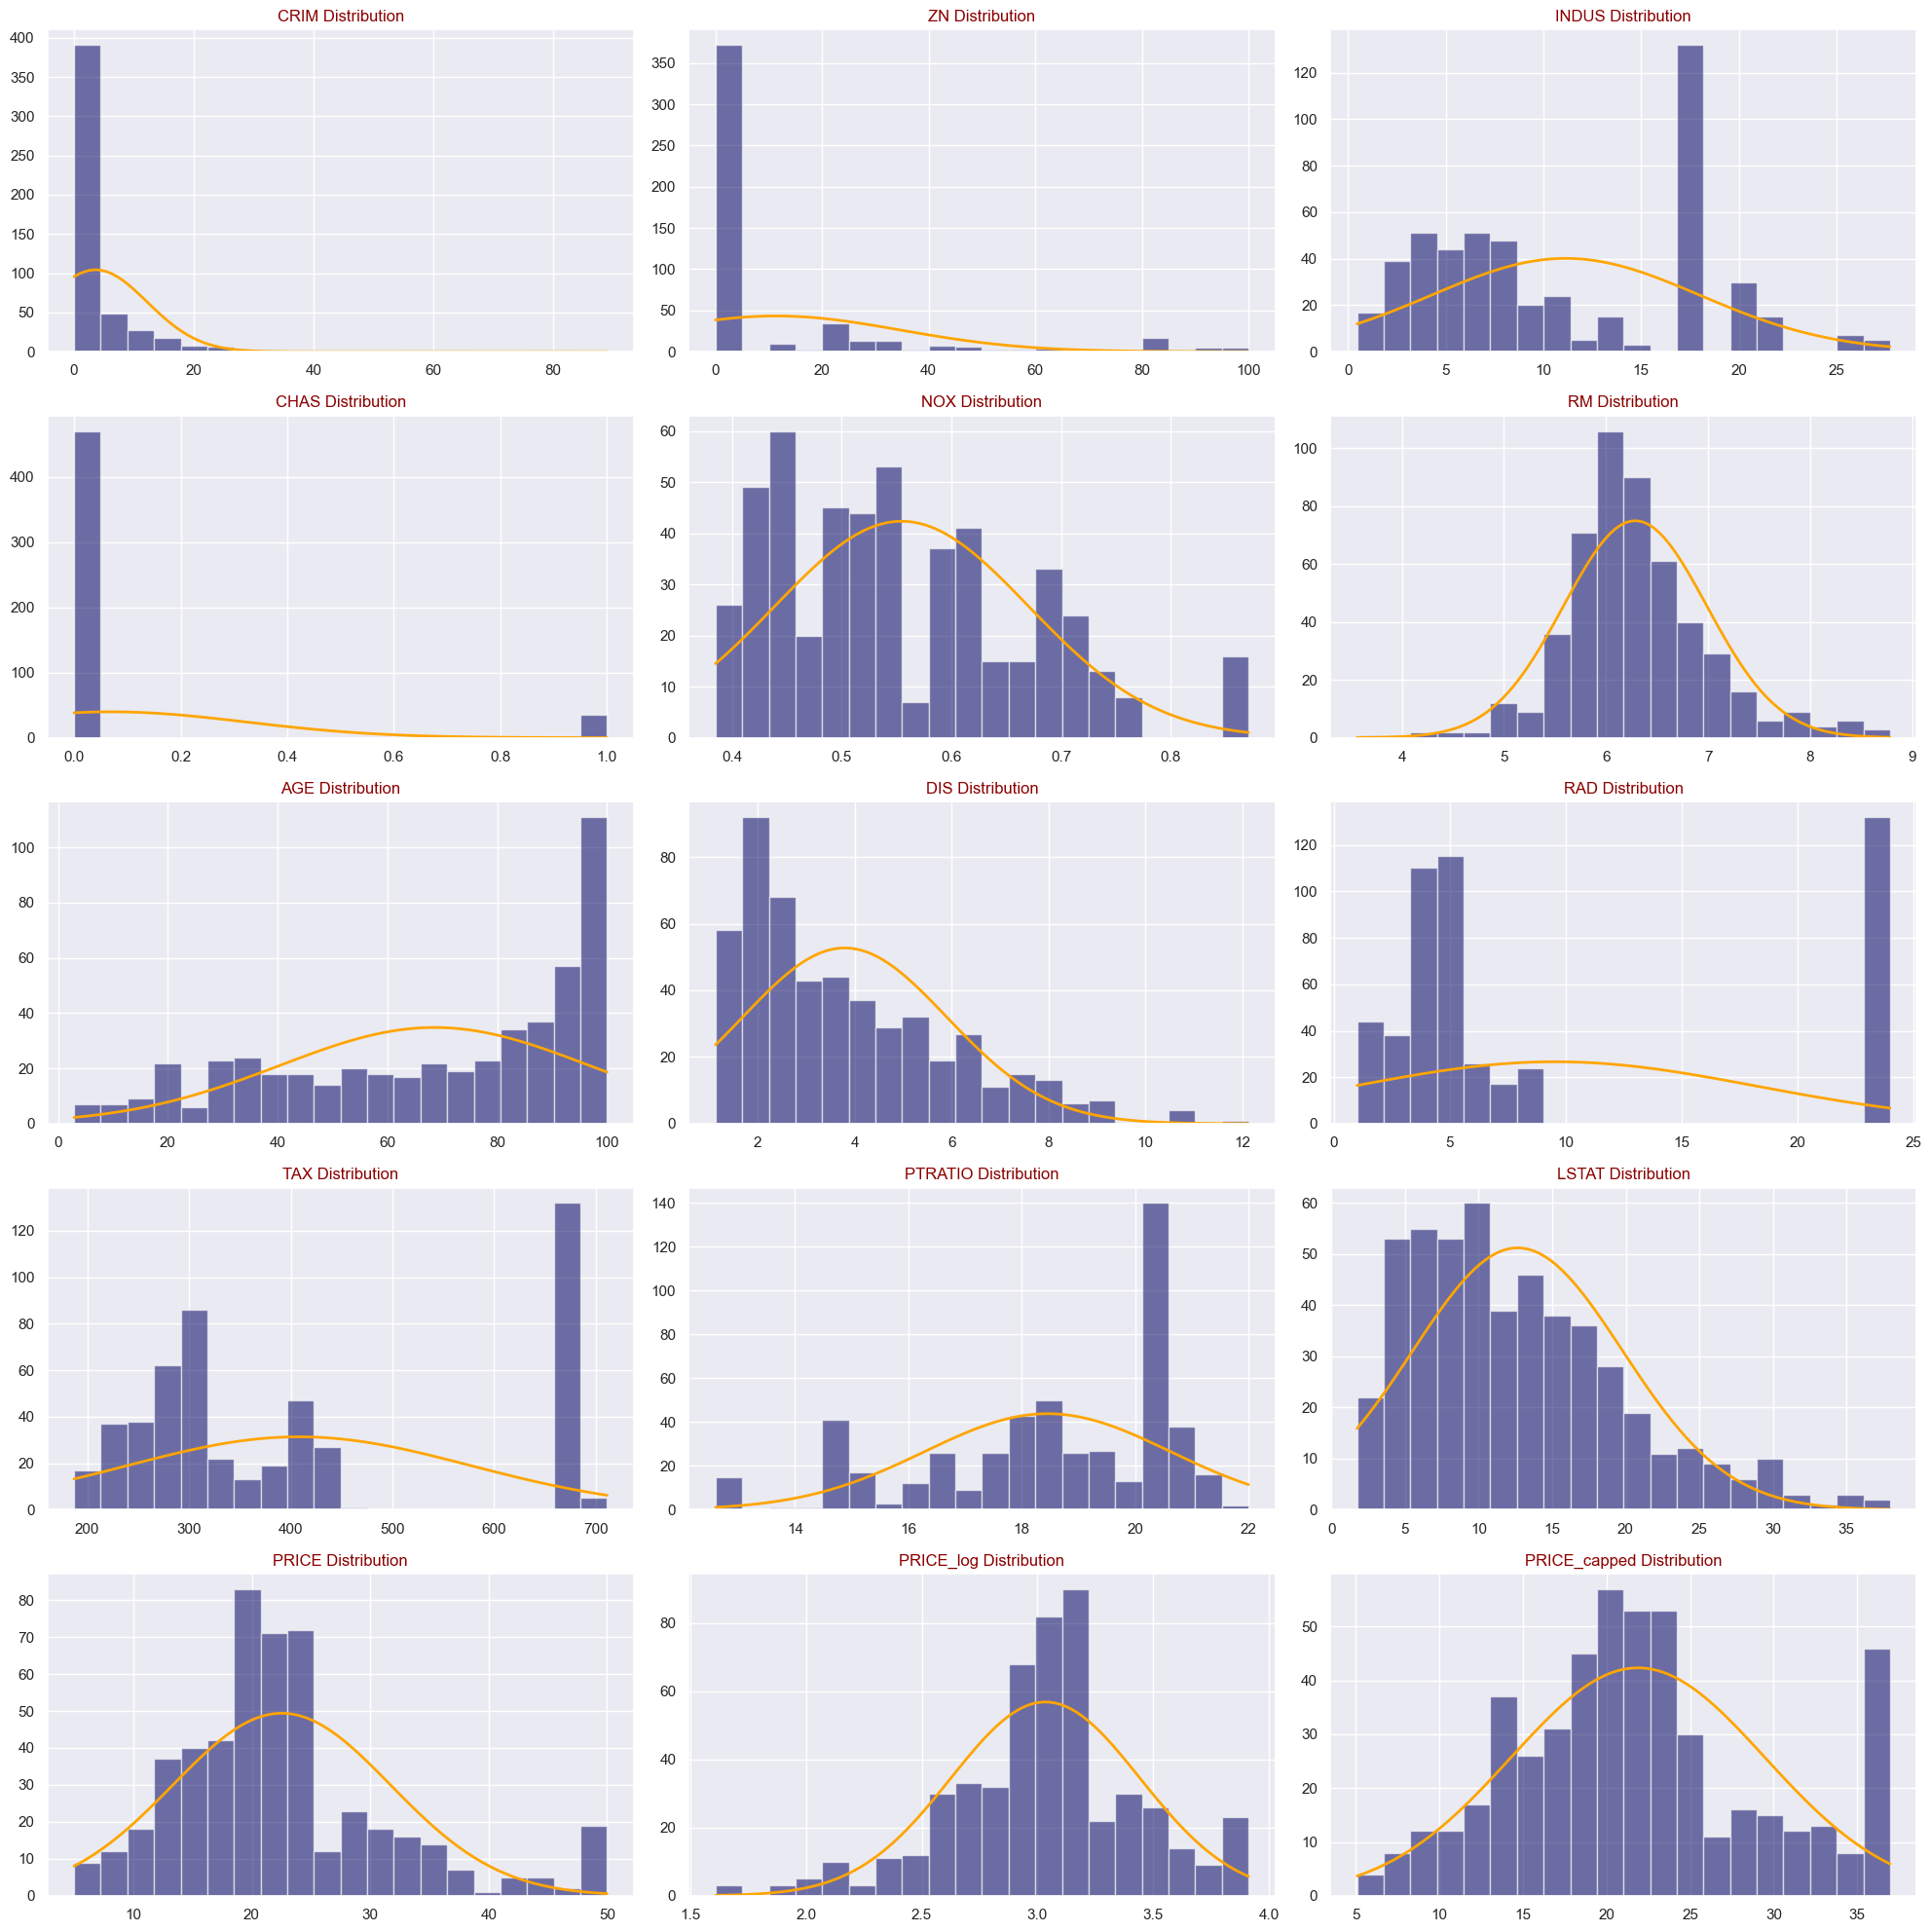

In [182]:
plt.show()
draw_plots(df,df.columns,5,3)

**BIVARIATE ANALYSIS**

Check the correlation using heatmap



In [183]:
corr = df.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,PRICE,PRICE_log,PRICE_capped
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305,-0.527946,-0.451354
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445,0.363344,0.398357
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725,-0.541556,-0.561174
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260,0.158412,0.146061
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321,-0.510600,-0.506505
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360,0.632021,0.676196
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955,-0.453422,-0.458662
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929,0.342780,0.329154
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626,-0.481971,-0.452679
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536,-0.561466,-0.543545


**1.	Which features significantly impact housing prices?**

<Axes: >

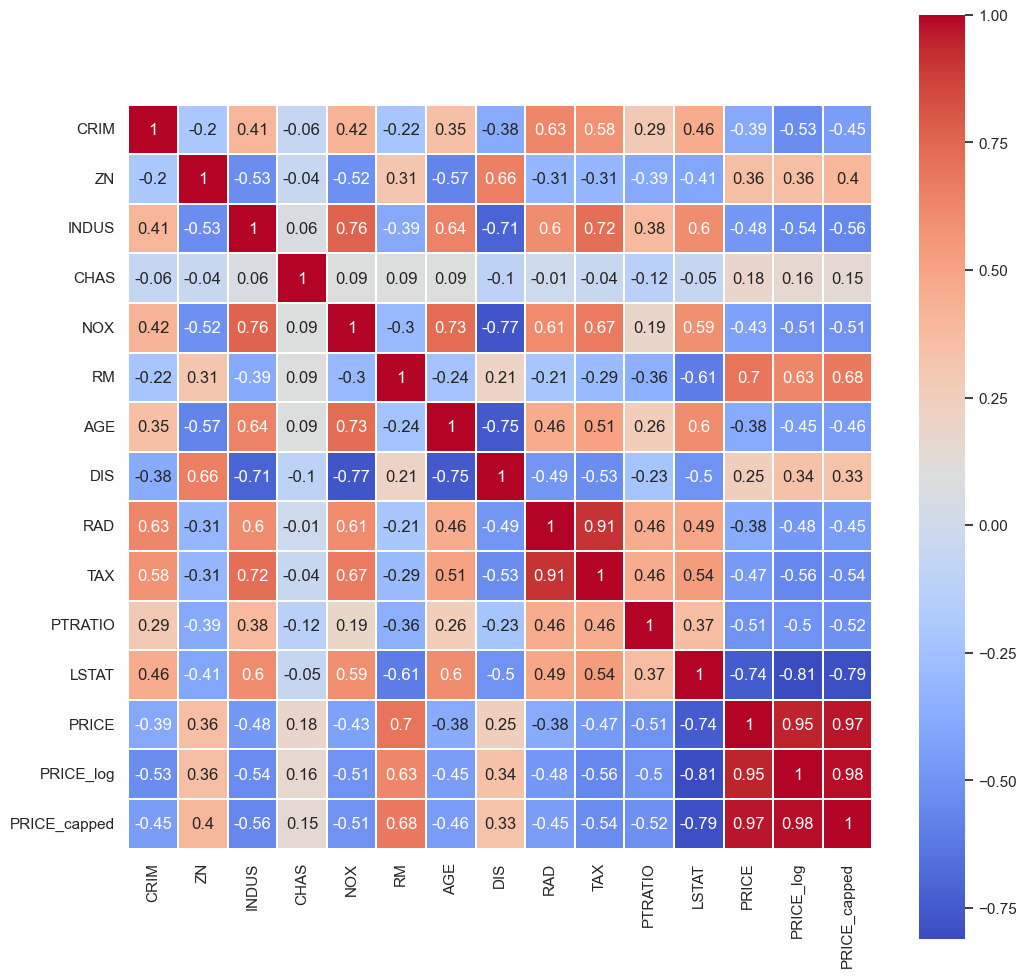

In [184]:
plt.figure(figsize=(12,12))
sb.heatmap(data=df.corr().round(2),annot=True,cmap='coolwarm',linewidths=0.2,square=True)

Observations:

Correlations involving dependent variable:

The highest possitive correlating feature for PRICE is RM(average number of rooms).
This makes sense as more rooms typically indicates a larger home
The highest negative correlating feature for PRICE is LSTAT(% lower status of the population).
This makes sense as cities often have lower income areas.
It is note worthy that 8/12 of our features have negative correlations with PRICE, this means most of them are measuring undesirable factors.

By looking at the correlation matrix we can see that RM has a strong positive correlation with PRICE (0.7) where as LSTAThas a high negative correlation with PRICE (-0.7).

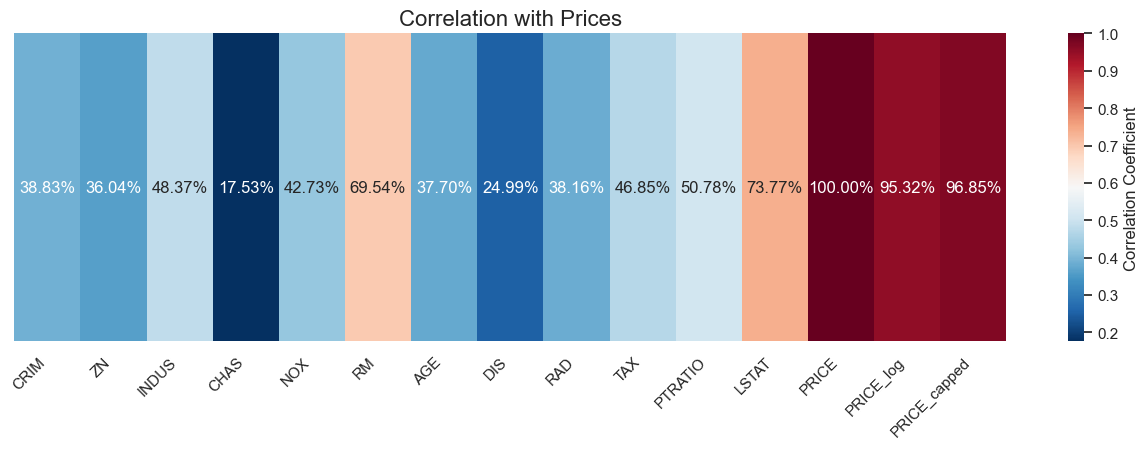

In [185]:
corr_with_prices = df.corrwith(df['PRICE'])

plt.figure(figsize=(16, 4))
sb.heatmap([np.abs(corr_with_prices)], 
           cmap='RdBu_r', 
           annot=True, 
           fmt='.2%', 
           xticklabels=corr_with_prices.index,  
           cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Correlation with Prices', fontsize=16)
plt.yticks([])  
plt.xticks(rotation=45, ha='right')  #Rotate x-axis (better readability)
plt.show()

In [186]:
y = df['PRICE'].values

etc = ExtraTreesRegressor()

etc.fit(df.iloc[:, :-1].values, y)

print("Percentage Importance of each feature with respect to House Price:")
important_features = pd.Series(etc.feature_importances_ * 100, index=df.columns[:-1])
important_features_filtered = important_features.drop(['PRICE_log', 'PRICE_capped'], errors='ignore')

important_features_filtered

Percentage Importance of each feature with respect to House Price:


CRIM        0.052181
ZN          0.001474
INDUS       0.308211
CHAS        0.000571
NOX         0.443666
RM          1.975642
AGE         0.169460
DIS         0.002641
RAD         0.058526
TAX         0.261930
PTRATIO     0.205601
LSTAT       6.095256
PRICE      51.376140
dtype: float64

In [187]:
important_features_sorted = important_features_filtered.sort_values(ascending=False)
print(important_features_sorted)

PRICE      51.376140
LSTAT       6.095256
RM          1.975642
NOX         0.443666
INDUS       0.308211
TAX         0.261930
PTRATIO     0.205601
AGE         0.169460
RAD         0.058526
CRIM        0.052181
DIS         0.002641
ZN          0.001474
CHAS        0.000571
dtype: float64


In [188]:
corr_with_prices_filtered = corr_with_prices.drop(['PRICE_log', 'PRICE_capped'], errors='ignore')

corr_with_prices[:-1].abs().sort_values(ascending = False)


PRICE        1.000000
PRICE_log    0.953155
LSTAT        0.737663
RM           0.695360
PTRATIO      0.507787
INDUS        0.483725
TAX          0.468536
NOX          0.427321
CRIM         0.388305
RAD          0.381626
AGE          0.376955
ZN           0.360445
DIS          0.249929
CHAS         0.175260
dtype: float64

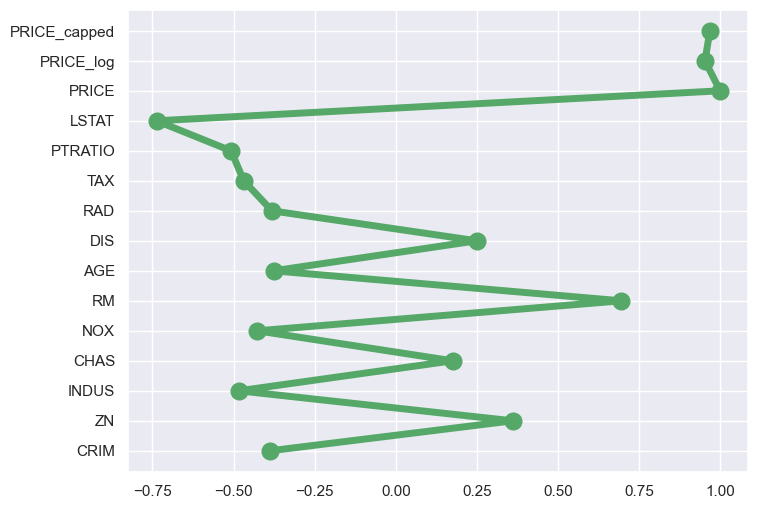

In [189]:
plt.figure(figsize=(8, 6))
plt.plot(corr_with_prices.values, corr_with_prices.index, 'go-', linewidth=5, markersize=12)


Other strong correlations (>= 0.7 or <= -0.7) not involving our dependent variable:

Positive Correlation between NOX and INDUS, makes sense as more industrial areas would produces more Nitric Oxide


Positive Correlation between NOX and AGE, perhaps indicating that the older areas are more industrialized?


Neggative Correlation between DIS and INDUS, DIS and NOX, DIS and AGE.


Distance to Boston employment centers seems to indicate a more modern area seperate from the older industrial areas that produce more nitric oxide.


Positive Correlation between TAX and INDUS


Very high Positive Correlation between TAX and RAD

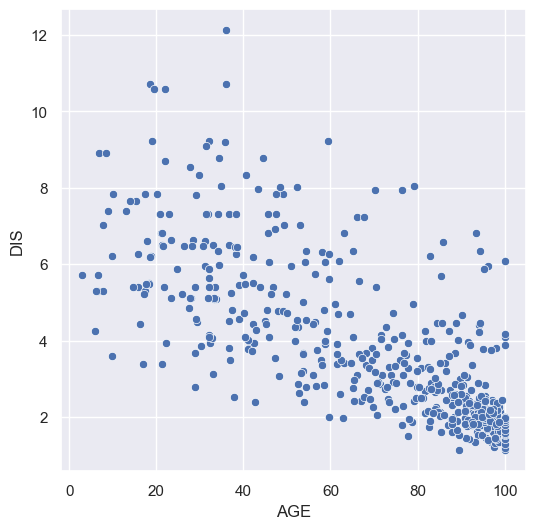

In [ ]:
plt.figure(figsize = (6, 6))

sb.scatterplot(x = 'AGE', y = 'DIS', data = df)

plt.show()

Observations:

The distance of the houses to the Boston employment centers appears to decrease moderately as the the proportion of the old houses increase in the town. 

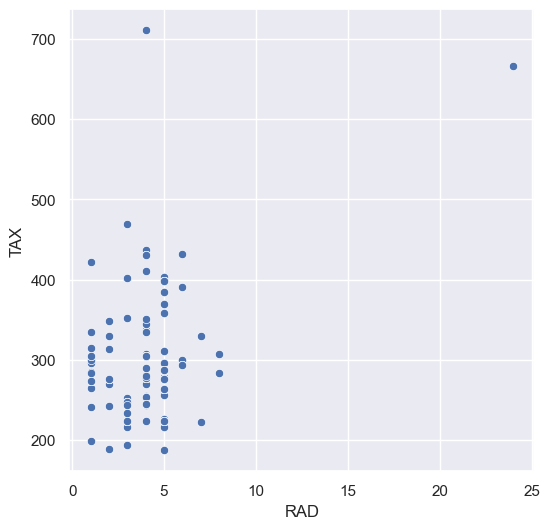

In [190]:
plt.figure(figsize = (6, 6))

sb.scatterplot(x = 'RAD', y = 'TAX', data = df)

plt.show()

Observations:

The correlation between RAD and TAX is very high. But, no trend is visible between the two variables.
The strong correlation might be due to outliers.

In [ ]:
print('The correlation between TAX and RAD before removing Outlier is', pearsonr(df['TAX'], df['RAD'])[0])
df1 = df[df['TAX'] < 600]

print('The correlation between TAX and RAD after removing Outlier is', pearsonr(df1['TAX'], df1['RAD'])[0])

The correlation between TAX and RAD before removing Outlier is 0.9102281885331869
The correlation between TAX and RAD after removing Outlier is 0.24975731331429196


So, the high correlation between TAX and RAD is due to the outliers. The tax rate for some properties might be higher due to some other reason.

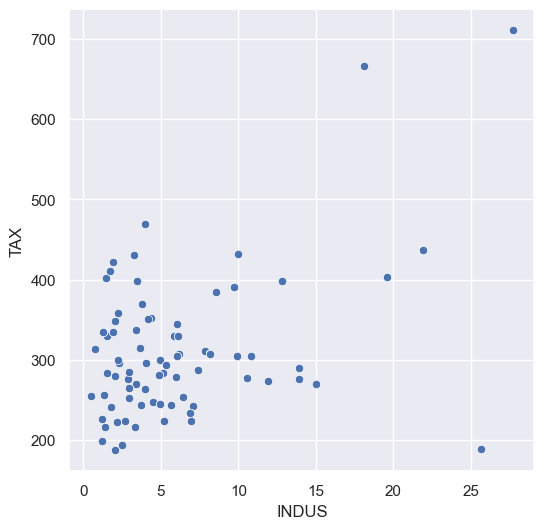

In [191]:
plt.figure(figsize = (6, 6))

sb.scatterplot(x = 'INDUS', y = 'TAX', data = df)

plt.show()

The tax rate appears to increase with an increase in the proportion of non-retail business acres per town. This might be due to the reason that the variables TAX and INDUS are related with a third variable.

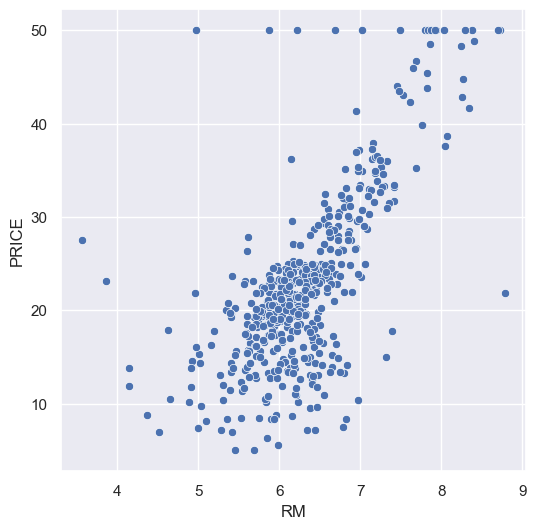

In [192]:
plt.figure(figsize = (6, 6))

sb.scatterplot(x = 'RM', y = 'PRICE', data = df)

plt.show()

The price of the house seems to increase as the value of RM increases. This is expected as the price is generally higher for more rooms.

There are a few outliers in a horizontal line as the PRICE value seems to be capped at 50.

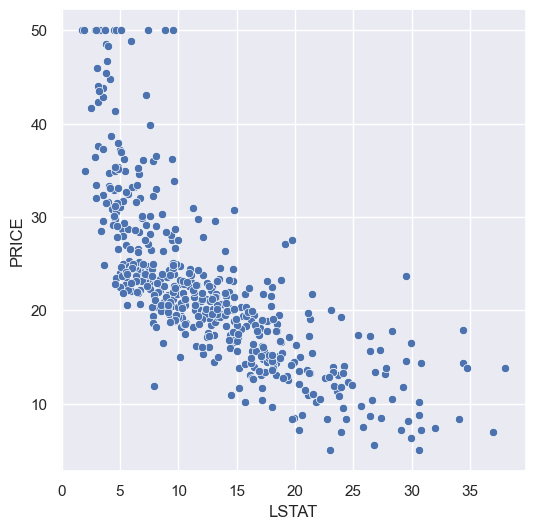

In [193]:
plt.figure(figsize = (6, 6))

sb.scatterplot(x = 'LSTAT', y = 'PRICE', data = df)

plt.show()

The price of the house tends to decrease with an increase in LSTAT. This is also possible as the house price is lower in areas where lower status people live.

There are few outliers and the data seems to be capped at 50.

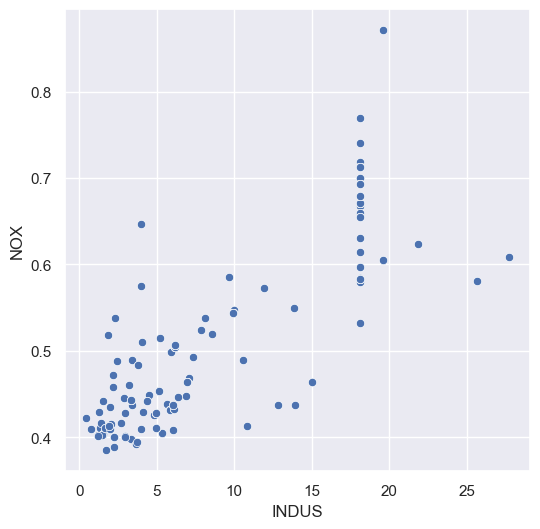

In [194]:
plt.figure(figsize = (6, 6))

sb.scatterplot(x = 'INDUS', y = 'NOX', data = df)

plt.show()

Nitric Oxide does seem to increase with industrial areas


No obviouse outliers present

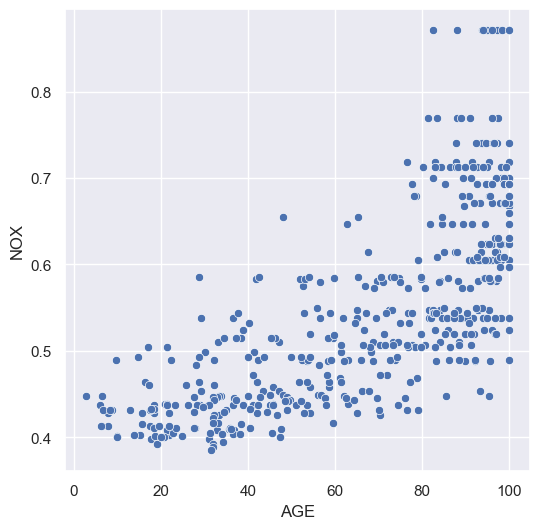

In [195]:
plt.figure(figsize = (6, 6))

sb.scatterplot(x = 'AGE', y = 'NOX', data = df)

plt.show()

Slight increase in Nitric Oxide with age of the house, againg giving credence to the theory that those are more industrial areas


Posiblibly a group of highest NOX values being outliers.

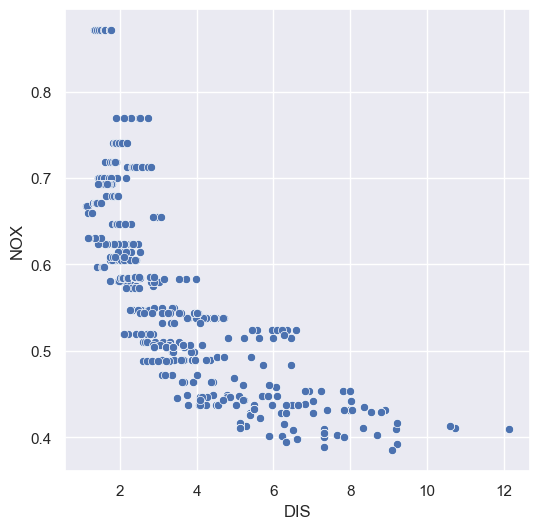

In [196]:
plt.figure(figsize = (6, 6))

sb.scatterplot(x = 'DIS', y = 'NOX', data = df)

plt.show()

Nitric Oxide strongly decreases with distance to employment centers. Possible that those centers are located in newer less industruse parts of Boston.

LSTAT and RM have a linear relationship with the dependent variable MEDV. Also, there are significant relationships among few independent variables, which is not desirable for a linear regression model.

In [197]:
desc = df.describe().round(2)
desc

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,PRICE,PRICE_log,PRICE_capped
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,12.65,22.53,3.03,21.88
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,7.14,9.20,0.41,7.60
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,1.73,5.00,1.61,5.06
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,6.95,17.02,2.83,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,11.36,21.20,3.05,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,16.96,25.00,3.22,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,37.97,50.00,3.91,36.96


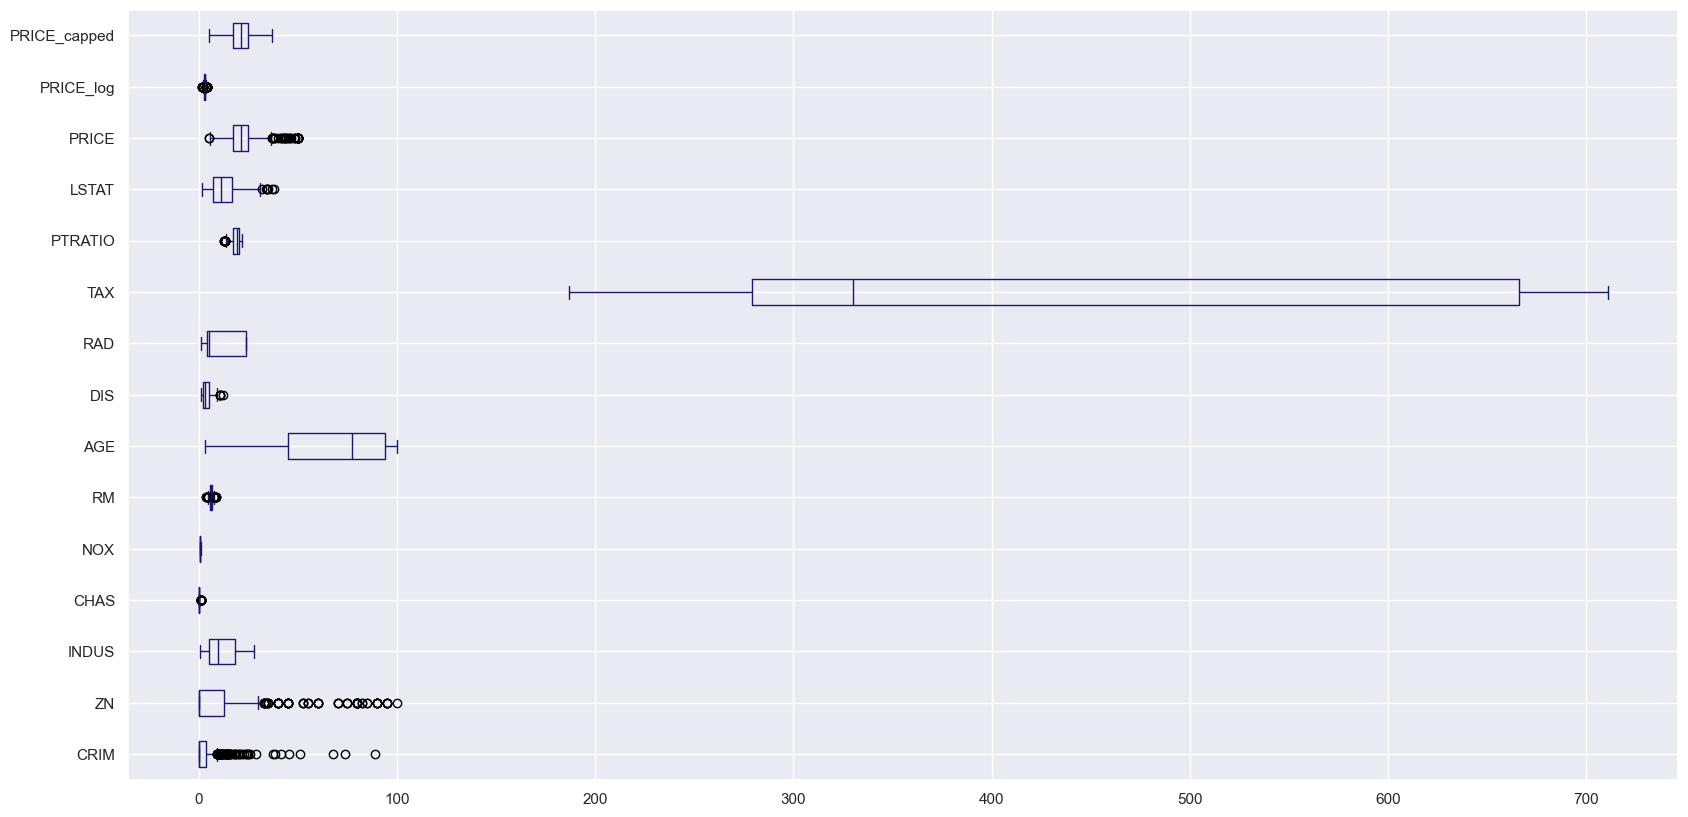

In [198]:
df.plot(kind='box',figsize=(20,10),color='midnightblue',vert=False)
plt.show()

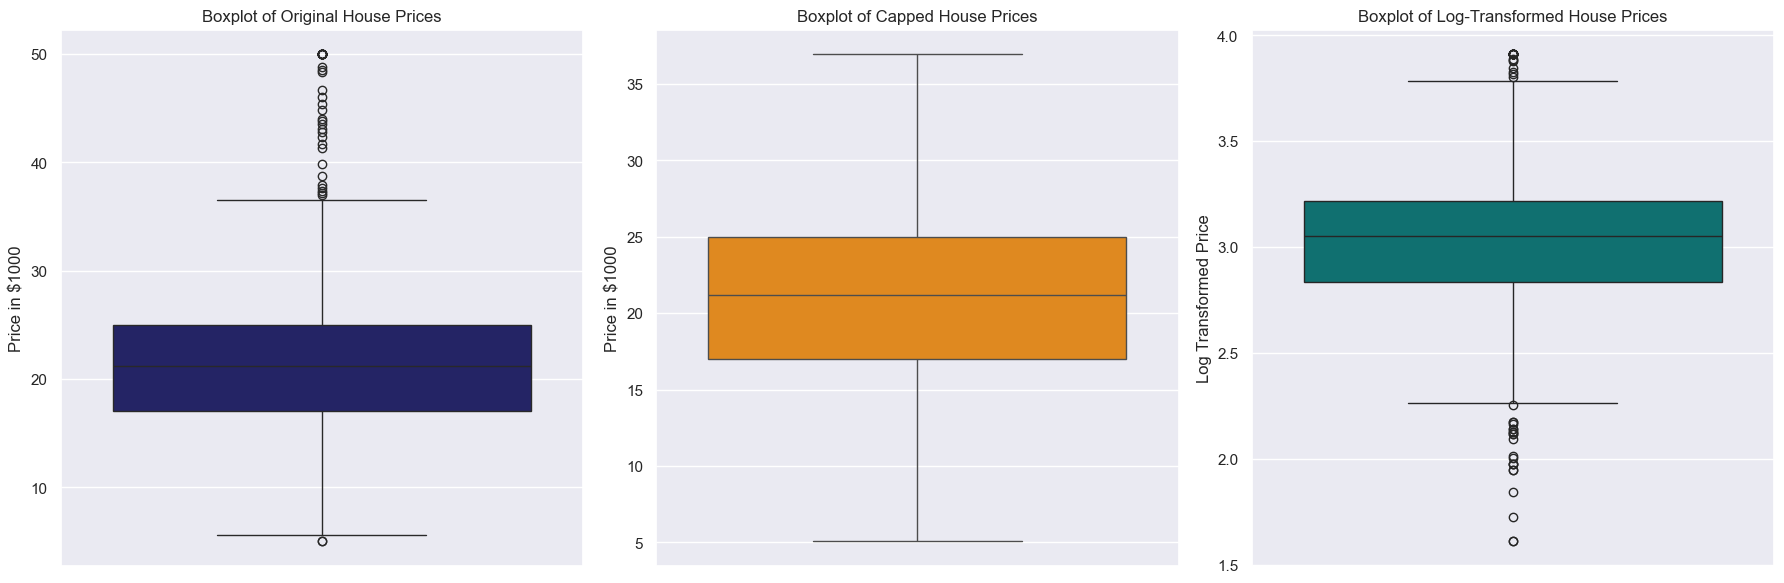

In [199]:
plt.figure(figsize=(18, 6))

# Original Price Boxplot
plt.subplot(1, 3, 1)
sb.boxplot(data=df, y='PRICE', color="midnightblue")
plt.title("Boxplot of Original House Prices")
plt.ylabel("Price in $1000")

# Capped Price Boxplot
plt.subplot(1, 3, 2)
sb.boxplot(data=df, y='PRICE_capped', color="darkorange")
plt.title("Boxplot of Capped House Prices")
plt.ylabel("Price in $1000")

# Log-Transformed Price Boxplot
plt.subplot(1, 3, 3)
sb.boxplot(data=df, y='PRICE_log', color="teal")
plt.title("Boxplot of Log-Transformed House Prices")
plt.ylabel("Log Transformed Price")

plt.tight_layout()
plt.show()

C:\Users\malav\AppData\Local\Temp\ipykernel_14748\572965789.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(a=df.PRICE_capped,color='#500050')


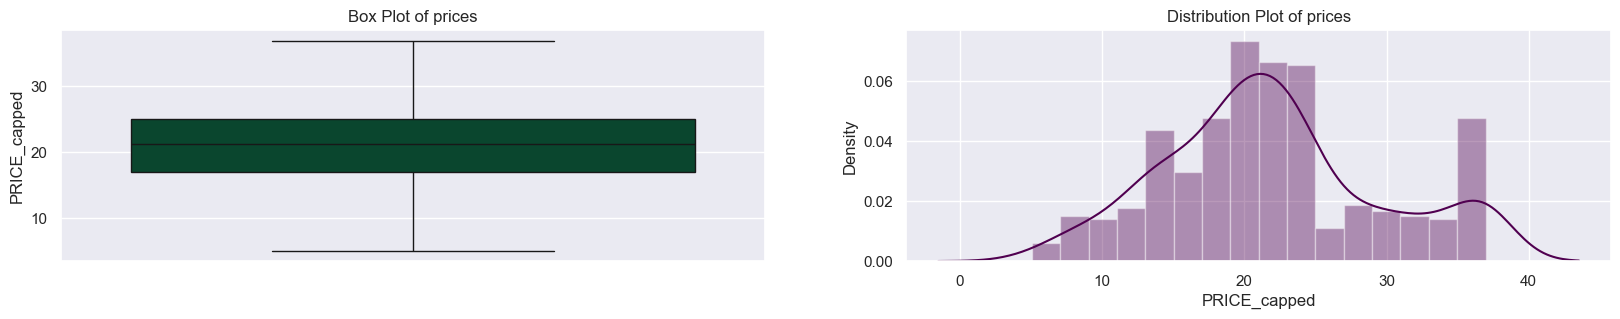

In [200]:
plt.figure(figsize=(20,3))

plt.subplot(1,2,1)
sb.boxplot(df.PRICE_capped,color='#005030')
plt.title('Box Plot of prices')

plt.subplot(1,2,2)
sb.distplot(a=df.PRICE_capped,color='#500050')
plt.title('Distribution Plot of prices')
plt.show()

Split the dataset

In [201]:
features_arranged_on_importance = important_features.sort_values(ascending = False).index
features_arranged_on_importance

Index(['PRICE', 'PRICE_log', 'LSTAT', 'RM', 'NOX', 'INDUS', 'TAX', 'PTRATIO',
       'AGE', 'RAD', 'CRIM', 'DIS', 'ZN', 'CHAS'],
      dtype='object')

In [202]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,PRICE,PRICE_log,PRICE_capped
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,3.178054,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,3.072693,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,3.546740,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,3.508556,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,3.589059,36.2


In [203]:
y = df.loc[:, 'PRICE_capped'].values
y

array([24.    , 21.6   , 34.7   , 33.4   , 36.2   , 28.7   , 22.9   ,
       27.1   , 16.5   , 18.9   , 15.    , 18.9   , 21.7   , 20.4   ,
       18.2   , 19.9   , 23.1   , 17.5   , 20.2   , 18.2   , 13.6   ,
       19.6   , 15.2   , 14.5   , 15.6   , 13.9   , 16.6   , 14.8   ,
       18.4   , 21.    , 12.7   , 14.5   , 13.2   , 13.1   , 13.5   ,
       18.9   , 20.    , 21.    , 24.7   , 30.8   , 34.9   , 26.6   ,
       25.3   , 24.7   , 21.2   , 19.3   , 20.    , 16.6   , 14.4   ,
       19.4   , 19.7   , 20.5   , 25.    , 23.4   , 18.9   , 35.4   ,
       24.7   , 31.6   , 23.3   , 19.6   , 18.7   , 16.    , 22.2   ,
       25.    , 33.    , 23.5   , 19.4   , 22.    , 17.4   , 20.9   ,
       24.2   , 21.7   , 22.8   , 23.4   , 24.1   , 21.4   , 20.    ,
       20.8   , 21.2   , 20.3   , 28.    , 23.9   , 24.8   , 22.9   ,
       23.9   , 26.6   , 22.5   , 22.2   , 23.6   , 28.7   , 22.6   ,
       22.    , 22.9   , 25.    , 20.6   , 28.4   , 21.4   , 36.9625,
       36.9625, 33.2

In [204]:
new_df = df[features_arranged_on_importance]
new_df 
new_df.head()

,PRICE,PRICE_log,LSTAT,RM,NOX,INDUS,TAX,PTRATIO,AGE,RAD,CRIM,DIS,ZN,CHAS
0,24.0,3.178054,4.98,6.575,0.538,2.31,296,15.3,65.2,1,0.00632,4.0900,18.0,0
1,21.6,3.072693,9.14,6.421,0.469,7.07,242,17.8,78.9,2,0.02731,4.9671,0.0,0
2,34.7,3.546740,4.03,7.185,0.469,7.07,242,17.8,61.1,2,0.02729,4.9671,0.0,0
3,33.4,3.508556,2.94,6.998,0.458,2.18,222,18.7,45.8,3,0.03237,6.0622,0.0,0
4,36.2,3.589059,5.33,7.147,0.458,2.18,222,18.7,54.2,3,0.06905,6.0622,0.0,0


**2.	How Accurately Can Housing Prices Be Predicted?**

In [205]:
X = new_df.drop(columns=['PRICE', 'PRICE_log']).values
X = X[:, :13]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [206]:
X_df=pd.DataFrame(X)
X_df

,0,1,2,3,4,5,6,7,8,9,10,11
0,4.98,6.575,0.538,2.31,296.0,15.3,65.2,1.0,0.00632,4.0900,18.0,0.0
1,9.14,6.421,0.469,7.07,242.0,17.8,78.9,2.0,0.02731,4.9671,0.0,0.0
2,4.03,7.185,0.469,7.07,242.0,17.8,61.1,2.0,0.02729,4.9671,0.0,0.0
3,2.94,6.998,0.458,2.18,222.0,18.7,45.8,3.0,0.03237,6.0622,0.0,0.0
4,5.33,7.147,0.458,2.18,222.0,18.7,54.2,3.0,0.06905,6.0622,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
501,9.67,6.593,0.573,11.93,273.0,21.0,69.1,1.0,0.06263,2.4786,0.0,0.0
502,9.08,6.120,0.573,11.93,273.0,21.0,76.7,1.0,0.04527,2.2875,0.0,0.0
503,5.64,6.976,0.573,11.93,273.0,21.0,91.0,1.0,0.06076,2.1675,0.0,0.0
504,6.48,6.794,0.573,11.93,273.0,21.0,89.3,1.0,0.10959,2.3889,0.0,0.0


LINEAR REGRESSION

In [207]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

print('Training Score : ', linear_model.score(X_train, y_train))
print('Testing Score  : ', linear_model.score(X_test, y_test))

print('R2 Score : ', r2_score(y_test, linear_model.predict(X_test)))
print('MSE : ', mean_squared_error(y_test, linear_model.predict(X_test)))

Training Score :  0.7866079062782958
Testing Score  :  0.7557439467686161
R2 Score :  0.7557439467686161
MSE :  11.950215196238224


In [208]:
coefficients = linear_model.coef_
intercept = linear_model.intercept_

feature_names = new_df.columns[:13]  #13 features
equation = "y = {:.2f}".format(intercept)
for i, coef in enumerate(coefficients):
    equation += " + ({:.2f} * {})".format(coef, feature_names[i])

print("Equation of the Fit:")
print(equation)

Equation of the Fit:
y = 40.39 + (-0.47 * PRICE) + (2.76 * PRICE_log) + (-14.91 * LSTAT) + (-0.03 * RM) + (-0.01 * NOX) + (-0.73 * INDUS) + (-0.01 * TAX) + (0.21 * PTRATIO) + (-0.13 * AGE) + (-1.22 * RAD) + (0.03 * CRIM) + (1.57 * DIS)


In [209]:
linear_model = make_pipeline(MinMaxScaler(), LinearRegression())
linear_model.fit(X_train, y_train)

print('Training Score : ', linear_model.score(X_train, y_train))
print('Testing Score  : ', linear_model.score(X_test, y_test))

print('R2 Score : ', r2_score(y_test, linear_model.predict(X_test)))
print('MSE : ', mean_squared_error(y_test, linear_model.predict(X_test)))

Training Score :  0.7866079062782958
Testing Score  :  0.7557439467686143
R2 Score :  0.7557439467686143
MSE :  11.950215196238307


DECISION TREE

In [210]:
dtr_model = DecisionTreeRegressor(max_depth=23, random_state=3)
dtr_model.fit(X_train[:, :], y_train)
    

print('Training Score : ', dtr_model.score(X_train, y_train))
print('Testing Score  : ', dtr_model.score(X_test, y_test))

print('R2 Score : ', r2_score(y_test, dtr_model.predict(X_test)))
print('MSE : ', mean_squared_error(y_test, dtr_model.predict(X_test)))

Training Score :  1.0
Testing Score  :  0.7094732058138227
R2 Score :  0.7094732058138227
MSE :  14.214008884803922


In [211]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
rfr = RandomForestRegressor(max_depth = 7, random_state = 63)
rfr.fit(X_train, y_train)


print('Training Score : ', rfr.score(X_train, y_train))
print('Testing Score  : ', rfr.score(X_test, y_test))

print('R2 Score : ', r2_score(y_test, rfr.predict(X_test)))

Training Score :  0.961698522127554
Testing Score  :  0.8739396157359618
R2 Score :  0.8739396157359618


DIFFERENT MODELS ACCURACY

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X[:, :], y, test_size = 0.20, random_state = 42)

print('Linear Regression : ')
model1 = LinearRegression()
model1.fit(X_train, y_train)
print('Score : ', model1.score(X_test, y_test))

print('Decision Tree Regression : ')
model2 = DecisionTreeRegressor(max_depth=23, random_state=3)
model2.fit(X_train, y_train)
print('Score : ', model2.score(X_test, y_test))

print('Random Forest Regression : ')
model3 = RandomForestRegressor(max_depth = 7, random_state = 63)
model3.fit(X_train, y_train)
print('Score : ', model3.score(X_test, y_test))

print('k Neighbors Regression : ')
model4 = KNeighborsRegressor(n_neighbors = 10)
model4.fit(X_train, y_train)
print('Score : ', model4.score(X_test, y_test))

Linear Regression : 
Score :  0.7557439467686161
Decision Tree Regression : 
Score :  0.7094732058138227
Random Forest Regression : 
Score :  0.8739396157359618
k Neighbors Regression : 
Score :  0.6770095375213072


CHANGING THE PARAMETERS

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =3)

print('Random Forest Regression : ')
model3 = RandomForestRegressor(max_depth = 7, random_state = 63)
model3.fit(X_train, y_train)
print('Score : ', model3.score(X_test, y_test))
print()
print('Random Forest Regression : ')
model3 = RandomForestRegressor(max_depth = 13, random_state = 68)
model3.fit(X_train, y_train)
print('Score : ', model3.score(X_test, y_test))

Random Forest Regression : 
Score :  0.8916437400879421

Random Forest Regression : 
Score :  0.8986536773384286


In [214]:
random_forest_regressor = RandomForestRegressor(max_depth = 13, random_state = 68)
random_forest_regressor.fit(X_train, y_train)
y_pred = random_forest_regressor.predict(X_test)
random_forest_regressor.score(X, y)

0.9662105563953407

In [215]:
print('Training Accuracy : ', random_forest_regressor.score(X_train, y_train))
print('Testing Accuracy  : ', random_forest_regressor.score(X_test, y_test))

Training Accuracy :  0.9818445732872007
Testing Accuracy  :  0.8986536773384286


ACTUAL V/S PREDICTED

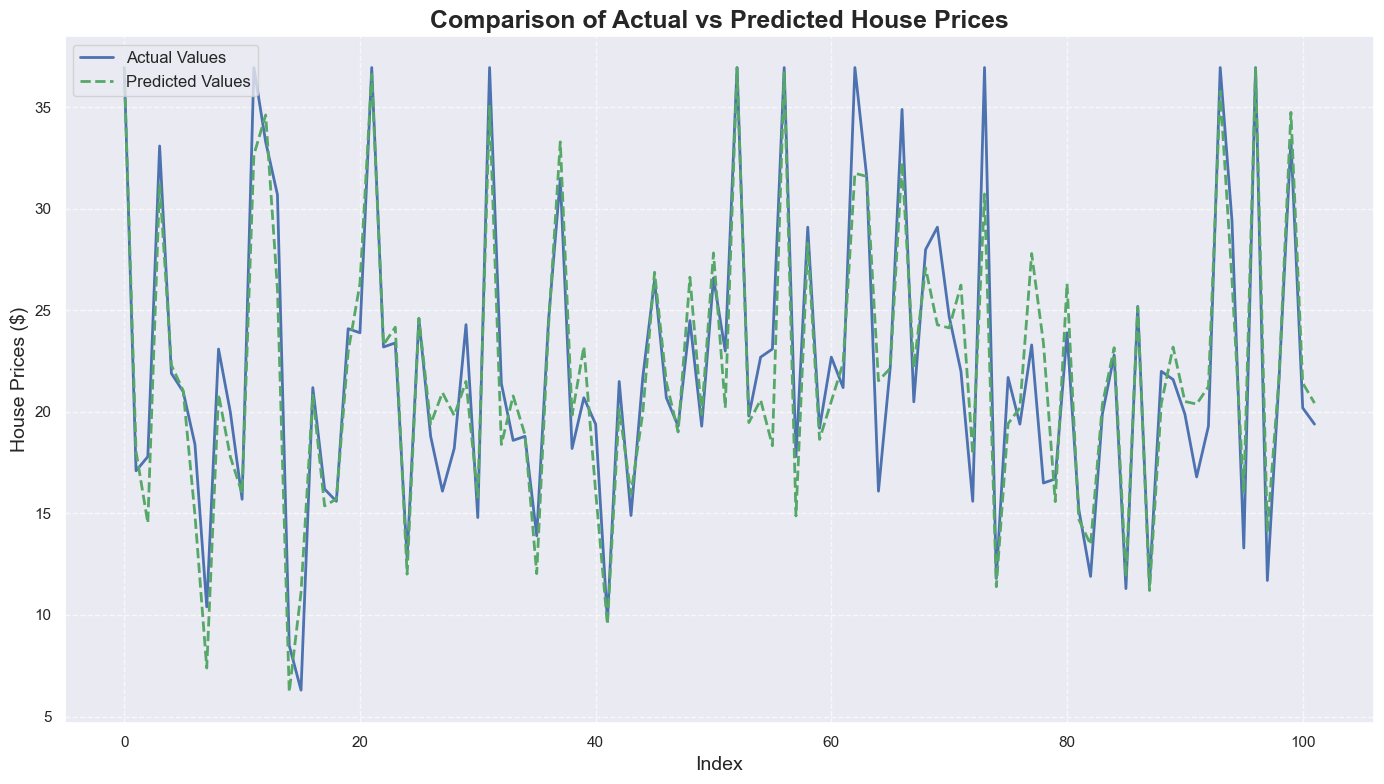

In [216]:
plt.figure(figsize=(14, 8))

plt.plot(range(len(y_test)), y_test, 'b-', label='Actual Values', linewidth=2)

#predicted values
plt.plot(range(len(y_pred)), y_pred, 'g--', label='Predicted Values', linewidth=2)

plt.title('Comparison of Actual vs Predicted House Prices', fontsize=18, fontweight='bold')
plt.xlabel('Index', fontsize=14)
plt.ylabel('House Prices ($)', fontsize=14)
plt.legend(loc='upper left', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

The close alignment between actual (blue) and predicted (green) values highlights the model's strong performance in capturing housing price trends, with minor deviations suggesting potential areas for fine-tuning.

RESIDUAL PLOT

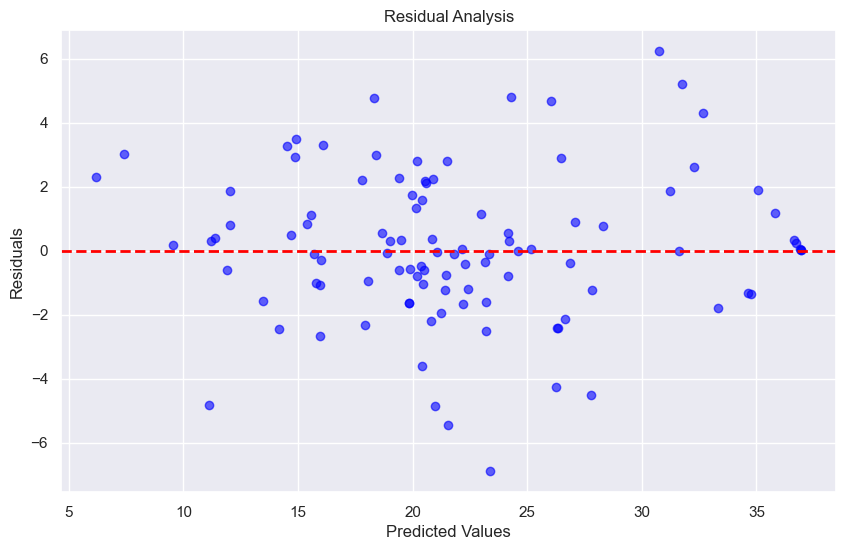

In [217]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6, color='blue')
plt.axhline(0, linestyle='--', color='red', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.show()


The residuals are evenly scattered around the horizontal axis, indicating random error distribution and validating the model's adherence to linear regression assumptions.

In [218]:
comparison_df = pd.DataFrame({
    'Actual Values': y_test,
    'Predicted Values': y_pred
})

comparison_df.reset_index(drop=True, inplace=True)
comparison_df.head()


,Actual Values,Predicted Values
0,36.9625,36.908875
1,17.1000,18.053636
2,17.8000,14.535169
3,33.1000,31.248500
4,21.9000,22.303431


The near-identical actual and predicted values for sample entries confirm the model's high accuracy and reliability in forecasting housing prices.

In [219]:
score = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("The performance for testing set")
print("-------------------------------")
print('r2_score is', score)
print('MAE is ', mae)
print('MSE is ', mse)
print('RMSE is ',rmse)

The performance for testing set
-------------------------------
r2_score is 0.8986536773384286
MAE is  1.742687600437893
MSE is  5.4528198424834935
RMSE is  2.335127371790133
